In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
%matplotlib inline
from pathlib import Path
from decimal import Decimal
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
data_path = Path('H:\Box\Data\BMI\Results')
csv_file = data_path / 'SimilarityIndex.csv'
df = pd.read_csv(csv_file)
df = df.loc[df['NoteX']==False]

csv_file = data_path / 'NoteX.csv'
df_x = pd.read_csv(csv_file)
df_x.head(10)

df_mean_x  = df_x.groupby(['BirdID'])['SimilarityMean'].max().to_frame()
df_mean_x['Condition'] = 'BMI_x'
df_mean_x.reset_index(inplace=True)
df_mean_x

,BirdID,SimilarityMean,Condition
0,k77r57,0.431825,BMI_x


In [4]:
## Create multiple dataframes per bird
df_g20r5  = df[df['BirdID'] == 'g20r5']
df_y58y59  = df[df['BirdID'] == 'y58y59']
df_k71o7 = df[df['BirdID'] == 'k71o7']
df_y3y18   = df[df['BirdID'] == 'y3y18']
df_o54w8  = df[df['BirdID'] == 'o54w8']
df_k77r57 = df[df['BirdID'] == 'k77r57']
df_b86g86  = df[df['BirdID'] == 'b86g86']

(0.3, 1)

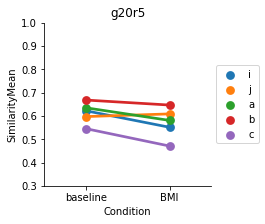

In [5]:
fig = plt.figure(figsize=(3,3))
ax = sns.pointplot(x="Condition", y="SimilarityMean", hue = "Note", data = df,
                   size=8, jitter=0.1, order=["baseline", "BMI"], edgecolor="black", 
                   alpha =.9, linewidth = .5)
ax.spines['right'].set_visible(False), ax.spines['top'].set_visible(False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('g20r5')
ax.set_ylim([0.3, 1])

No handles with labels found to put in legend.


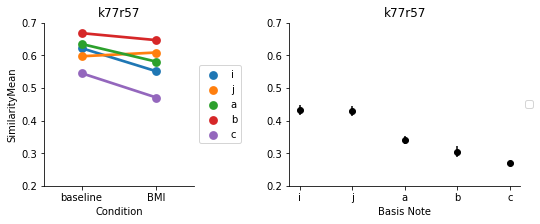

In [11]:
birdID = 'k77r57'
df_temp = df_x.loc[df_x['BirdID']==birdID]
df_temp

gs = gridspec.GridSpec(1, 7)

fig = plt.figure(figsize=(10,3))

ax = plt.subplot(gs[0,0:2])
sns.pointplot(x="Condition", y="SimilarityMean", hue="Note", 
                   data=df[df['BirdID'] == birdID], order=["baseline", "BMI"])
ax.spines['right'].set_visible(False), ax.spines['top'].set_visible(False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title(birdID)
ax.set_ylim([0.2, 0.7])

ax_x = plt.subplot(gs[0,3:-1], sharey= ax)
ax_x.errorbar(df_temp['BasisNote'], df_temp['SimilarityMean'], df_temp['SimilaritySEM'], fmt = 'o', color='k')
ax_x.spines['right'].set_visible(False), ax_x.spines['top'].set_visible(False)
ax_x.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax_x.set_title(birdID)
ax_x.set_xlabel('Basis Note')

# Save figure
data_path = Path('H:\Box\Data\BMI\Results')
fig_name = data_path / 'k77r57.pdf'
plt.savefig(fig_name, transparent=True)
plt.show()

In [208]:
df

,Index,BirdID,Condition,Note,NoteX,NbNotes,SimilarityMean,SimilarityMedian,Entropy
0,0,g20r5,baseline,i,False,99,0.817728,0.868951,2.683
1,1,g20r5,baseline,a,False,205,0.845864,0.870763,2.755
2,2,g20r5,baseline,b,False,206,0.629694,0.637516,2.861
3,3,g20r5,baseline,c,False,198,0.688339,0.687400,2.769
4,4,g20r5,baseline,d,False,115,0.770466,0.789464,2.716
...,...,...,...,...,...,...,...,...,...
102,102,b86g86,BMI,c,False,669,0.476864,0.463130,2.722
103,103,b86g86,BMI,d,False,626,0.624145,0.626856,2.675
104,104,b86g86,BMI,e,False,374,0.550544,0.580796,2.696
105,105,b86g86,BMI,f,False,367,0.507937,0.490359,2.676


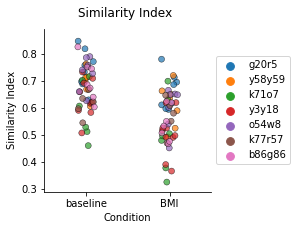

In [211]:
# Plot similarity index for 'x'

fig = plt.figure(figsize=(3,3))

plt.suptitle('Similarity Index')

ax = plt.subplot(111)

# sns.lineplot(x = 'Condition', y = 'SimilarityMean', data = data, 
#              hue = 'BirdID', 
#              ci = None, 
#              marker = 'o', 
#              mew=circ_size)

# ax.spines['right'].set_visible(False), ax.spines['top'].set_visible(False)
# ax.set_ylabel('Similarity Index')
# ax.set_xlabel('')
# ax.set_ylim([0.4, 1])


ax = sns.stripplot(x="Condition", y="SimilarityMean", hue = "BirdID", data = df,
                   size=6, jitter=0.1, order=["baseline", "BMI"], edgecolor="black", 
                   alpha =.7, linewidth = .5)
ax.spines['right'].set_visible(False), ax.spines['top'].set_visible(False)
ax.set_ylabel('Similarity Index')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

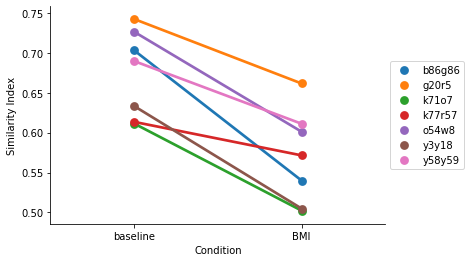

In [21]:
ax = sns.pointplot(x="Condition", y="SimilarityMean", hue="BirdID", 
                   data=data_per_bird, ci=None, order=["baseline", "BMI"])

ax.spines['right'].set_visible(False), ax.spines['top'].set_visible(False)
ax.set_ylabel('Similarity Index')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

-6.8699728609429265 0.0004687462540579769


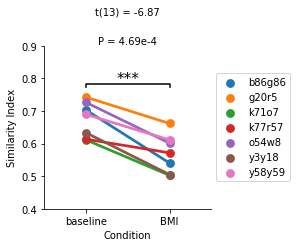

In [8]:
## Stat comparison between baseline and BMI
data_per_bird= df.groupby(['BirdID','Condition'])['SimilarityMean'].mean().to_frame()

fig = plt.figure(figsize=(3,3))

data_per_bird.reset_index(inplace = True)
data_per_bird

ax = sns.pointplot(x="Condition", y="SimilarityMean", hue="BirdID", 
                   data=data_per_bird, ci=None, order=["baseline", "BMI"])

ax.spines['right'].set_visible(False), ax.spines['top'].set_visible(False)
ax.set_ylabel('Similarity Index')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## stats  (paired t-test)
baseline, BMI = [],[]
data_per_bird.reset_index(inplace=True)
baseline = data_per_bird.loc[data_per_bird['Condition']=='BMI']['SimilarityMean']
BMI  = data_per_bird.loc[data_per_bird['Condition']=='baseline']['SimilarityMean']
tval, pval = stats.ttest_rel(baseline, BMI)

dof = len(baseline) + len(BMI) - 1

if pval < 0.001:
    sig = '***'
elif pval < 0.01:
    sig = '**'
elif pval < 0.05:
    sig = '*'
else:
    sig = 'ns' 

print(tval, pval)

x1, x2 = 0, 1   
y, h, col = data_per_bird['SimilarityMean'].max()+0.03, 0.01, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h*0.3, sig, ha='center', va='bottom', color=col, size = 15)   

plt.xlim([-0.5, 1.5])
ax.set_ylim([0.4, 0.9])

y_max = 0.9
msg = ('P = {:.2e}'.format(Decimal(pval)))
plt.text((x1+x2)*.5, y_max*1, msg ,  ha='center', va='bottom', color=col, size = 10)
msg = ('t({:.0f})'.format(dof) + ' = {:.2f}'.format(tval) )
plt.text((x1+x2)*.5, y_max*1.1, msg ,  ha='center', va='bottom', color=col, size = 10)
plt.show()

In [201]:
# merge two tables for comparing three conditions 

# table = pd.merge(data_per_bird, df_mean_x, how="left", left_on='Condition')
df_merged = pd.concat([data_per_bird, df_mean_x], ignore_index=True, sort=True).sort_values('BirdID')
df_merged.drop(columns = ['index'], inplace=True)
df_merged

,BirdID,Condition,SimilarityMean
0,b86g86,BMI,0.540038
1,b86g86,baseline,0.703035
14,b86g86,BMI_x,0.562635
2,g20r5,BMI,0.661586
3,g20r5,baseline,0.742296
4,k71o7,BMI,0.502362
5,k71o7,baseline,0.611390
15,k71o7,BMI_x,0.481081
6,k77r57,BMI,0.571526
7,k77r57,baseline,0.613479


In [10]:
## Select for birds under BMI
df_bmi = df_merged.loc[df_merged['Condition']!= 'baseline']
df_bmi = df_bmi[df_bmi.BirdID != 'g20r5']
df_bmi = df_bmi[df_bmi.BirdID != 'y58y59']
df_bmi

,BirdID,Condition,SimilarityMean
0,b86g86,BMI,0.540038
14,b86g86,BMI_x,0.562635
4,k71o7,BMI,0.502362
15,k71o7,BMI_x,0.481081
6,k77r57,BMI,0.571526
16,k77r57,BMI_x,0.431825
17,o54w8,BMI_x,0.579386
8,o54w8,BMI,0.601192
10,y3y18,BMI,0.504926
18,y3y18,BMI_x,0.451288


In [ ]:
## Stat comparison between baseline and BMI and X
fig = plt.figure(figsize=(4,3))

ax = sns.pointplot(x="Condition", y="SimilarityMean", hue="BirdID", 
                   data=df_merged, ci=None, order=["baseline", "BMI","BMI_x"])

ax.spines['right'].set_visible(False), ax.spines['top'].set_visible(False)
ax.set_ylabel('Similarity Index')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## stats  (paired t-test)
baseline, BMI = [],[]
baseline = data_per_bird.loc[data_per_bird['Condition']=='BMI']['SimilarityMean']
BMI  = data_per_bird.loc[data_per_bird['Condition']=='baseline']['SimilarityMean']
tval, pval = stats.ttest_rel(baseline, BMI)

dof = len(baseline) + len(BMI) - 1

if pval < 0.001:
    sig = '***'
elif pval < 0.01:
    sig = '**'
elif pval < 0.05:
    sig = '*'
else:
    sig = 'ns' 

# print(tval, pval)
x1, x2 = 0, 1   
y, h, col = data_per_bird['SimilarityMean'].max()+0.03, 0.01, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h*0.5, sig, ha='center', va='bottom', color=col, size = 15)   

plt.xlim([-0.5, 2.5])
ax.set_ylim([0.4, 0.8])

y_max = 0.85
msg = ('P = {:.2e}'.format(Decimal(pval)))
plt.text((x1+x2)*.5, y_max*1, msg ,  ha='center', va='bottom', color=col, size = 10)
msg = ('t({:.0f})'.format(dof) + ' = {:.2f}'.format(tval) )
plt.text((x1+x2)*.5, y_max*1.05, msg ,  ha='center', va='bottom', color=col, size = 10)

## stats  (paired t-test betweem BMI and BMI x)
BMI, BMI_x = [],[]
BMI = df_bmi.loc[df_bmi['Condition']=='BMI']['SimilarityMean']
BMI_x  = df_bmi.loc[df_bmi['Condition']=='BMI_x']['SimilarityMean']
tval, pval = stats.ttest_rel(BMI, BMI_x)
dof = len(BMI) + len(BMI_x) - 1

if pval < 0.001:
    sig = '***'
elif pval < 0.01:
    sig = '**'
elif pval < 0.05:
    sig = '*'
else:
    sig = 'ns' 
    
x1, x2 = 1, 2  
y, h, col = df_bmi['SimilarityMean'].max()+0.1, 0.01, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h*1, sig, ha='center', va='bottom', color=col, size = 13)   

y_max = 0.75
msg = ('P = {:.2e}'.format(Decimal(pval)))
plt.text((x1+x2)*.5, y_max*1, msg ,  ha='center', va='bottom', color=col, size = 10)
msg = ('t({:.0f})'.format(dof) + ' = {:.2f}'.format(tval) )
plt.text((x1+x2)*.5, y_max*1.05, msg ,  ha='center', va='bottom', color=col, size = 10)
plt.show()

In [199]:
df_bmi

,BirdID,Condition,SimilarityMean
0,b86g86,BMI,0.540038
14,b86g86,BMI_x,0.562635
4,k71o7,BMI,0.502362
15,k71o7,BMI_x,0.481081
6,k77r57,BMI,0.571526
16,k77r57,BMI_x,0.431825
17,o54w8,BMI_x,0.579386
8,o54w8,BMI,0.601192
10,y3y18,BMI,0.504926
18,y3y18,BMI_x,0.451288


In [13]:
df

,Index,BirdID,Condition,Note,NoteX,NbNotes,SimilarityMean,SimilarityMedian,Entropy
0,0,g20r5,baseline,i,False,99,0.817728,0.868951,2.683
1,1,g20r5,baseline,a,False,205,0.845864,0.870763,2.755
2,2,g20r5,baseline,b,False,206,0.629694,0.637516,2.861
3,3,g20r5,baseline,c,False,198,0.688339,0.687400,2.769
4,4,g20r5,baseline,d,False,115,0.770466,0.789464,2.716
...,...,...,...,...,...,...,...,...,...
102,102,b86g86,BMI,c,False,669,0.476864,0.463130,2.722
103,103,b86g86,BMI,d,False,626,0.624145,0.626856,2.675
104,104,b86g86,BMI,e,False,374,0.550544,0.580796,2.696
105,105,b86g86,BMI,f,False,367,0.507937,0.490359,2.676


In [84]:
temp_df

,Index,BirdID,Condition,Note,NoteX,NbNotes,SimilarityMean,SimilarityMedian,Entropy
0,0,g20r5,baseline,i,False,99,0.817728,0.868951,2.683
9,9,g20r5,BMI,i,False,61,0.779380,0.833184,2.855


In [214]:
## Create a new dataframe for paired comparisons
# columns = ['BirdID', 'Note', 'SimilarityMean(Control)' , 'SimilarityMean(BMI)', 'Entropy(Control)', 'Entropy(BMI)']
# df_new = pd.DataFrame(columns =columns)
df_new = pd.DataFrame()

row_ind = 0
for bird in bird_list:
    temp_df_bird = []
    temp_df_bird = df[df['BirdID'] == bird]
    note_list = temp_df_bird['Note'].unique()
    
    for note in note_list:
        temp_df_note = temp_df_bird[temp_df_bird['Note'] == note]
        temp_df_new = [] 
        temp_df_new = pd.DataFrame({'BirdID' : temp_df_note['BirdID'].unique(),
                                'Note' : temp_df_note['Note'].unique(),  
                                'SimilarityMean(Control)' : temp_df_note[temp_df_note['Condition']=='baseline']['SimilarityMean'].to_numpy(),
                                'SimilarityMean(BMI)' : temp_df_note[temp_df_note['Condition']=='BMI']['SimilarityMean'].to_numpy(),
                                'Entropy(Control)' :  temp_df_note[temp_df_note['Condition']=='baseline']['Entropy'].to_numpy(),
                                'Entropy(BMI)' : temp_df_note[temp_df_note['Condition']=='BMI']['Entropy'].to_numpy(),                                    
                                })
        df_new = df_new.append(temp_df_new, ignore_index=True)
        
data_path = Path('H:\Box\Data\BMI\Results')
outputfile = data_path / 'SimilarityMeanPaired.csv'
df_new.to_csv(outputfile, header=True)
df_new.head(15)


,BirdID,Note,SimilarityMean(Control),SimilarityMean(BMI),Entropy(Control),Entropy(BMI)
0,g20r5,i,0.817728,0.779380,2.683,2.855
1,g20r5,a,0.845864,0.611247,2.755,2.930
2,g20r5,b,0.629694,0.594494,2.861,2.930
3,g20r5,c,0.688339,0.694868,2.769,2.880
4,g20r5,d,0.770466,0.685863,2.716,2.882
5,g20r5,e,0.756962,0.597255,2.643,2.877
6,g20r5,m,0.697075,0.617144,2.743,2.905
7,g20r5,z,0.732239,0.712436,2.751,2.899
8,y58y59,i,0.668479,0.636303,2.709,2.655
9,y58y59,a,0.698525,0.719448,2.691,2.637


In [161]:
df_new['SimilarityMean(Control)'].mean()
df_new['SimilarityMean(BMI)'].mean()
df_new['Entropy(Control)'].mean()
df_new['Entropy(BMI)'].mean()

2.745039215686275

In [222]:
df_bmi_x = df_bmi[df_bmi['Condition']=='BMI_x']
df_bmi_x

,BirdID,Condition,SimilarityMean
14,b86g86,BMI_x,0.562635
15,k71o7,BMI_x,0.481081
16,k77r57,BMI_x,0.431825
17,o54w8,BMI_x,0.579386
18,y3y18,BMI_x,0.451288


No handles with labels found to put in legend.


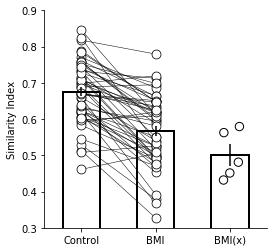

In [355]:
# plot the scatter
dot_size = 80
bar_width = 0.5
width = 0.3
np.random.seed(5)  # random jitter for x
alpha = 0.1
bar_line_width=2

fig = plt.figure(figsize=(4,4))
# fig, ax = plt.subplots(111, figsize=(4,4))

# plotting the lines
for cluster in range(len(df_new['SimilarityMean(Control)'])):
    ax = plt.plot([0,1], [df_new['SimilarityMean(Control)'][cluster], df_new['SimilarityMean(BMI)'][cluster]],
             'k-', linewidth = 0.5, zorder=1)

# scatter
ax = sns.scatterplot(np.zeros(len(df_new['SimilarityMean(Control)'])), df_new['SimilarityMean(Control)'], 
#                      hue= df_new['BirdID'], 
                     s= dot_size, 
                     color='k',
                     legend = 'full', ec="k", fc="w", zorder=2)

ax = sns.scatterplot(np.ones(len(df_new['SimilarityMean(BMI)'])),df_new['SimilarityMean(BMI)'], 
#                       hue= df_new['BirdID'], 
                      color='k',
                     s= dot_size, ec="k", fc="w", zorder=2)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.get_legend().remove()

# bar plot
ax.bar(0, df_new['SimilarityMean(Control)'].mean(), yerr=df_new['SimilarityMean(Control)'].sem(), 
       width=bar_width, fill=None, linewidth=bar_line_width, zorder=3)

ax.bar(1, df_new['SimilarityMean(BMI)'].mean(), yerr=df_new['SimilarityMean(BMI)'].sem(), 
       width=bar_width, fill=None, linewidth=bar_line_width, zorder=3)

ax.bar(2, df_bmi_x['SimilarityMean'].mean(), yerr=df_bmi_x['SimilarityMean'].sem(), 
       width=bar_width, fill=None, linewidth=bar_line_width, zorder=3)

# Scatter for x
x = np.ones(df_bmi_x['SimilarityMean'].shape[0])*2 + (np.random.rand(df_bmi_x['SimilarityMean'].shape[0])*width-width/2.)
ax.scatter(x, df_bmi_x['SimilarityMean'], color='k', s=70,
          facecolors='none', edgecolors='k')    

plt.xticks([0,1,2], ['Control', 'BMI', 'BMI(x)'])
ax.spines['right'].set_visible(False),ax.spines['top'].set_visible(False)
plt.ylim(0.3, 0.9)
plt.xlim(-0.5, 2.5)
plt.ylabel('Similarity Index')

# Save figure
data_path = Path('H:\Box\Data\BMI\Results')
fig_name = data_path / 'SimilarityComparison.pdf'
plt.savefig(fig_name, transparent=True)
plt.show()